In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_img, train_lab), (test_img, test_lab) = datasets.cifar10.load_data()
train_img , test_img = train_img / 255.0, test_img / 255.0

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

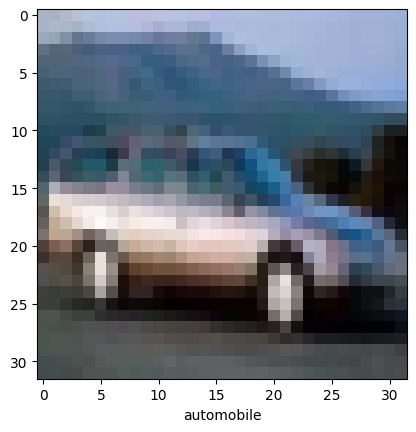

In [3]:
IMP_INDEX = 4

plt.imshow(train_img[IMP_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_lab[IMP_INDEX][0]])
plt.show()

CNN Model
-----

In [4]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation="relu"))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation="relu"))

c:\Users\PC\miniconda3\envs\tf-cpu\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation="relu"))
cnn_model.add(layers.Dense(10))

In [7]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
cnn_model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ["accuracy"]
)

history = cnn_model.fit(train_img, train_lab, epochs=10, validation_data=(test_img, test_lab))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3575 - loss: 1.7393 - val_accuracy: 0.5551 - val_loss: 1.2416
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5768 - loss: 1.1929 - val_accuracy: 0.6164 - val_loss: 1.0769
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6444 - loss: 1.0089 - val_accuracy: 0.6496 - val_loss: 0.9788
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6782 - loss: 0.9166 - val_accuracy: 0.6701 - val_loss: 0.9524
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7130 - loss: 0.8213 - val_accuracy: 0.6861 - val_loss: 0.9046
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7301 - loss: 0.7626 - val_accuracy: 0.6996 - val_loss: 0.8783
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7524 - loss: 0.7102 - val_accuracy: 0.7089 - val_loss: 0.8553
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7733 - loss: 0.6504

In [9]:
test_loss, test_acc = cnn_model.evaluate(test_img, test_lab, verbose=2)
print(test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.6997 - loss: 0.9285
0.6996999979019165


Data Augmnetation
---------

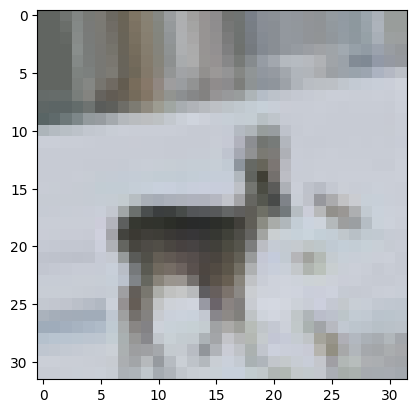

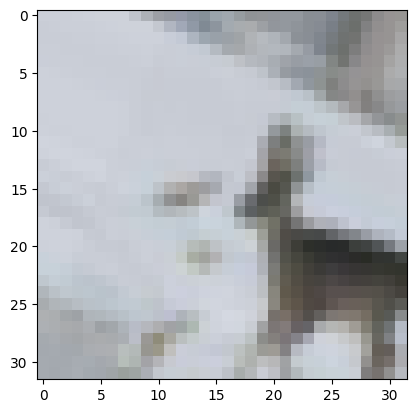

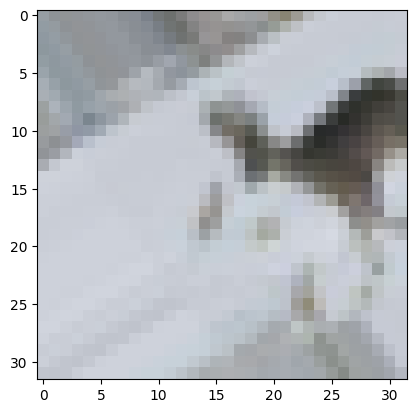

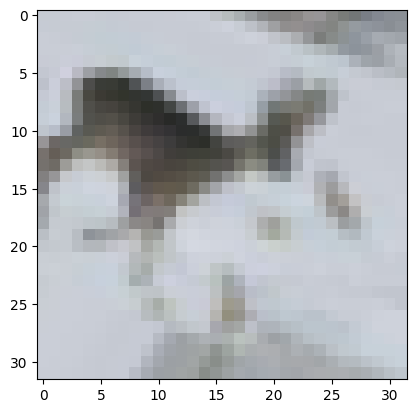

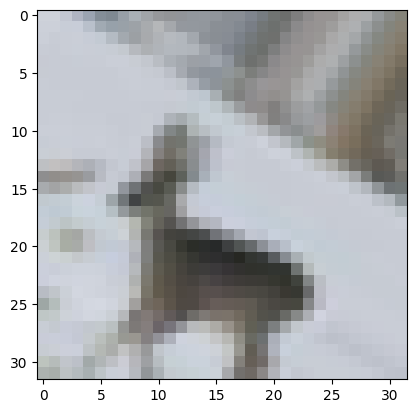

In [10]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_imgz = train_img[20]
img = image.img_to_array(test_imgz)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()

Pretrained Model
-------------

In [11]:
import os
from tensorflow import keras

In [12]:
# import os
# import numpy as np
# from sklearn.model_selection import train_test_split

# # ── Config ────────────────────────────────────────────────────────────
# DATA_DIR   = "PetImages"          #  PetImages/Cat/*.jpg , PetImages/Dog/*.jpg
# IMG_SIZE   = (180, 180)           #  resize target
# SEED       = 123
# AUTOTUNE   = tf.data.AUTOTUNE

# # ── 1. Collect file paths & labels in one go ──────────────────────────
# def scan_dataset(root):
#     """Return two numpy arrays: file paths and encoded integer labels."""
#     class_names = sorted(
#         d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))
#     )

#     paths, labels = [], []
#     for lbl, cname in enumerate(class_names):
#         for fname in os.listdir(os.path.join(root, cname)):
#             if fname.lower().endswith(".jpg"):
#                 paths.append(os.path.join(root, cname, fname))
#                 labels.append(lbl)

#     return np.array(paths), np.array(labels), class_names


# paths, labels, CLASS_NAMES = scan_dataset(DATA_DIR)

# # ── 2. Stratified split: 80 / 10 / 10 ────────────────────────────────
# X_tmp, X_test, y_tmp, y_test = train_test_split(
#     paths, labels, test_size=0.10, random_state=SEED, stratify=labels
# )

# X_train, X_val, y_train, y_val = train_test_split(
#     X_tmp, y_tmp, test_size=0.1111, random_state=SEED, stratify=y_tmp
# )
# # (0.1111 × 0.90 ≈ 0.10  ⇒ 80 / 10 / 10)

# # ── Robust decoder that always yields 3-channel float32 [0-1] ──────────
# @tf.function
# def _load_and_preprocess(path, label):
#     img_bytes = tf.io.read_file(path)
#     img = tf.image.decode_image(img_bytes, channels=0, expand_animations=False)
#     img.set_shape([None, None, None])
#     c = tf.shape(img)[-1]
#     idx = tf.clip_by_value(c, 1, 4) - 1  # 1→0, 2→1, 3→2, 4→3

#     def b0():  # 1ch
#         return tf.image.grayscale_to_rgb(img)
#     def b1():  # 2ch
#         return tf.image.grayscale_to_rgb(img[..., :1])
#     def b2():  # 3ch
#         return img
#     def b3():  # 4ch
#         return img[..., :3]

#     img = tf.switch_case(idx, branch_fns=[b0, b1, b2, b3])
#     img = tf.image.resize(img, IMG_SIZE)
#     img = tf.image.convert_image_dtype(img, tf.float32)
#     return img, label


# def make_ds(paths, labels, shuffle=False):
#     ds = tf.data.Dataset.from_tensor_slices((paths, labels))
#     if shuffle:
#         ds = ds.shuffle(len(paths), seed=SEED, reshuffle_each_iteration=True)

#     ds = (
#         ds.map(_load_and_preprocess, num_parallel_calls=AUTOTUNE, deterministic=False)
#           .cache()
#           .prefetch(AUTOTUNE)
#     )
#     return ds

# # ── rebuild datasets so new function takes effect ─────────────────────
# raw_train = make_ds(X_train, y_train, shuffle=True)
# raw_validation   = make_ds(X_val,   y_val)
# raw_test  = make_ds(X_test,  y_test)

# # ── 4. Metadata (optional) ────────────────────────────────────────────
# metadata = {
#     "class_names": CLASS_NAMES,
#     "num_classes": len(CLASS_NAMES),
#     "num_examples": {
#         "train": len(X_train),
#         "val":   len(X_val),
#         "test":  len(X_test),
#     },
# }
# print("\nMetadata")
# for k, v in metadata.items():
#     print(f"{k}: {v}")


In [15]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

# ── Config ────────────────────────────────────────────────────────────
DATA_DIR   = "PetImages"          #  PetImages/Cat/*.jpg , PetImages/Dog/*.jpg
IMG_SIZE   = (180, 180)           #  resize target
SEED       = 123
AUTOTUNE   = tf.data.AUTOTUNE

# ── 1. Collect file paths & labels in one go ──────────────────────────
def scan_dataset(root):
    """Return two numpy arrays: file paths and encoded integer labels."""
    class_names = sorted(
        d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))
    )

    paths, labels = [], []
    for lbl, cname in enumerate(class_names):
        for fname in os.listdir(os.path.join(root, cname)):
            if fname.lower().endswith(".jpg"):
                paths.append(os.path.join(root, cname, fname))
                labels.append(lbl)

    return np.array(paths), np.array(labels), class_names


paths, labels, CLASS_NAMES = scan_dataset(DATA_DIR)

# ── 2. Stratified split: 80 / 10 / 10 ────────────────────────────────
X_tmp, X_test, y_tmp, y_test = train_test_split(
    paths, labels, test_size=0.10, random_state=SEED, stratify=labels
)

X_train, X_val, y_train, y_val = train_test_split(
    X_tmp, y_tmp, test_size=0.1111, random_state=SEED, stratify=y_tmp
)
# (0.1111 × 0.90 ≈ 0.10  ⇒ 80 / 10 / 10)

# -------- Robust per-format decoder + channel normalization ----------
@tf.function
def _load_and_preprocess(path, label):
    bytes_ = tf.io.read_file(path)

    # --- Identify format from magic bytes (header) ---
    sig8   = tf.strings.substr(bytes_, 0, 8)
    sig2   = tf.strings.substr(bytes_, 0, 2)
    sig3   = tf.strings.substr(bytes_, 0, 3)
    is_png = tf.equal(sig8, b'\x89PNG\r\n\x1a\n')
    is_jpg = tf.equal(sig2, b'\xff\xd8')            # SOI
    is_bmp = tf.equal(sig2, b'BM')
    is_gif = tf.logical_or(tf.equal(sig3, b'GIF'),  # GIF87a / GIF89a
                           tf.equal(sig3, b'gif'))

    def dec_png():
        # Decode with native channels; handles 1,2,3,4 (this avoids decode_image)
        img = tf.image.decode_png(bytes_, channels=0)
        return img

    def dec_jpg():
        return tf.image.decode_jpeg(bytes_, channels=3, try_recover_truncated=True)

    def dec_bmp():
        return tf.image.decode_bmp(bytes_)  # always 3 channels

    def dec_gif():
        # returns [num_frames, H, W, 3]; take first frame
        gif = tf.image.decode_gif(bytes_)
        return gif[0]

    def dec_fallback():
        # As a last resort, try the generic decoder (may fail on odd files)
        return tf.image.decode_image(bytes_, channels=0, expand_animations=False)

    img = tf.case(
        [(is_png, dec_png), (is_jpg, dec_jpg), (is_bmp, dec_bmp), (is_gif, dec_gif)],
        default=dec_fallback,
        exclusive=False
    )
    img.set_shape([None, None, None])  # (H, W, C?)

    # --- Normalize channels to RGB (always output 3 channels) ---
    c = tf.shape(img)[-1]

    def from_gray():
        return tf.image.grayscale_to_rgb(img)                 # 1 -> 3

    def from_gray_alpha():
        gray = img[..., :1]                                   # drop alpha
        return tf.image.grayscale_to_rgb(gray)                # 2 -> 3

    def identity():
        return img                                            # 3 -> 3

    def drop_alpha():
        return img[..., :3]                                   # 4 -> 3

    img = tf.case(
        [(tf.equal(c, 1), from_gray),
         (tf.equal(c, 2), from_gray_alpha),
         (tf.equal(c, 4), drop_alpha)],
        default=identity,
        exclusive=True
    )

    # --- Resize & scale to [0,1] float32 ---
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img, label


def make_ds(paths, labels, shuffle=False):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    if shuffle:
        ds = ds.shuffle(len(paths), seed=SEED, reshuffle_each_iteration=True)

    ds = (
        ds.map(_load_and_preprocess, num_parallel_calls=AUTOTUNE, deterministic=False)
          .apply(tf.data.experimental.ignore_errors())   # skip any truly bad files
          .cache()
          .prefetch(AUTOTUNE)
    )
    return ds

In [16]:
# ── rebuild datasets so new function takes effect ─────────────────────
raw_train = make_ds(X_train, y_train, shuffle=True)
raw_validation   = make_ds(X_val,   y_val)
raw_test  = make_ds(X_test,  y_test)

# ── 4. Metadata (optional) ────────────────────────────────────────────
metadata = {
    "class_names": CLASS_NAMES,
    "num_classes": len(CLASS_NAMES),
    "num_examples": {
        "train": len(X_train),
        "val":   len(X_val),
        "test":  len(X_test),
    },
}
print("\nMetadata")
for k, v in metadata.items():
    print(f"{k}: {v}")

Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.

Metadata
class_names: ['Cat', 'Dog']
num_classes: 2
num_examples: {'train': 19967, 'val': 2496, 'test': 2496}


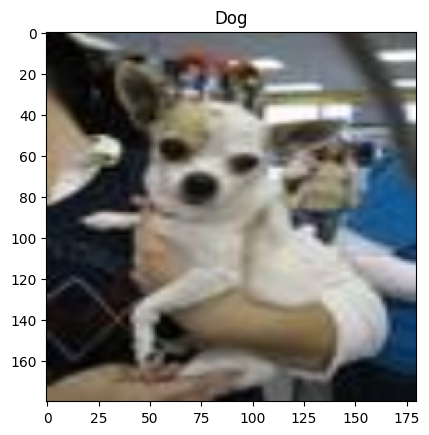

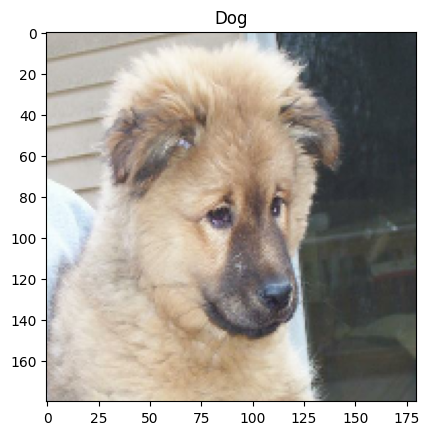

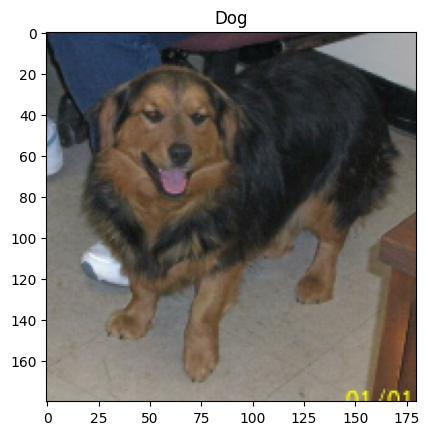

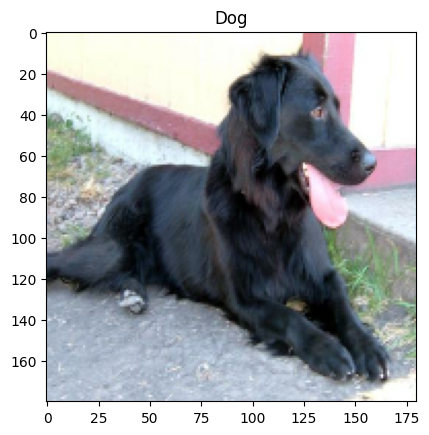

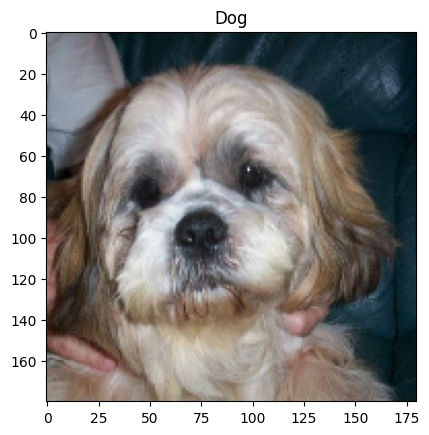

In [18]:
get_label_name = lambda label: metadata["class_names"][label]

for image, label in raw_train.take(5):
  # image = (image/127.5) - 1
  image = (image/255)
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [19]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  """
  returns an image that is reshaped to IMG_SIZE
  """
  image = (image/255)
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [20]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

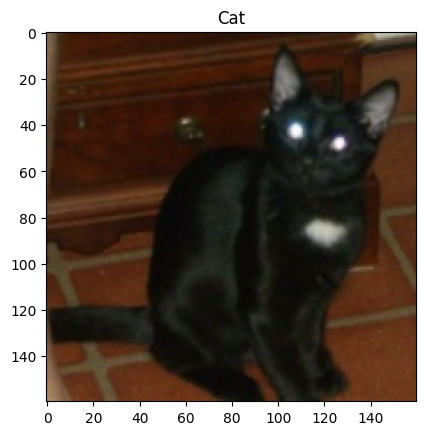

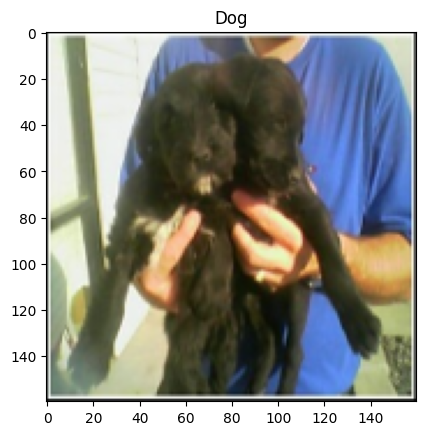

In [21]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [34]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_batches = test.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

print(train_batches)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 160, 160, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [35]:
for img, label in raw_train.take(2):
    print("Orignal Shape: ", img.shape)

for img, label in train.take(2):
    print("New Shape: ", img.shape)

Orignal Shape:  (180, 180, 3)
Orignal Shape:  (180, 180, 3)
New Shape:  (160, 160, 3)
New Shape:  (160, 160, 3)


In [36]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
base_model = keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top = False,
    weights = "imagenet"
)

In [37]:
base_model.summary()

Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 80,    │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 80, 80,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 80, 80,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 80, 80,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 80, 80,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 80, 80,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 81, 81,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 40, 40,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 40, 40,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [38]:
for image, _ in train_batches.take(1):
   pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [39]:
base_model.trainable = False

In [40]:
base_model.summary()

Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 80,    │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 80, 80,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 80, 80,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 80, 80,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 80, 80,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 80, 80,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 81, 81,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 40, 40,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 40, 40,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [41]:
global_avg_layer = keras.layers.GlobalAveragePooling2D()

In [42]:
pred_layer = keras.layers.Dense(1)

In [43]:
combined_model = keras.Sequential([
    base_model,
    global_avg_layer,
    pred_layer
])

In [44]:
combined_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [45]:
base_learning_rate = 0.0001
combined_model.compile(
    optimizer = keras.optimizers.RMSprop(learning_rate=base_learning_rate),
    loss = keras.losses.BinaryCrossentropy(from_logits=True),
    metrics = ["accuracy"]
)

In [46]:
initial_epochs = 3
validation_steps = 20

loss0, acc0 = combined_model.evaluate(validation_batches, steps = validation_steps)

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.3555 - loss: 0.9927


In [50]:
history = combined_model.fit(
    train_batches,
    epochs = initial_epochs,
    validation_data = validation_batches
)

Epoch 1/3
624/624 ━━━━━━━━━━━━━━━━━━━━ 77s 123ms/step - accuracy: 0.9710 - loss: 0.0752 - val_accuracy: 0.9699 - val_loss: 0.0805
Epoch 2/3
624/624 ━━━━━━━━━━━━━━━━━━━━ 77s 124ms/step - accuracy: 0.9726 - loss: 0.0705 - val_accuracy: 0.9707 - val_loss: 0.0778
Epoch 3/3
624/624 ━━━━━━━━━━━━━━━━━━━━ 77s 123ms/step - accuracy: 0.9735 - loss: 0.0691 - val_accuracy: 0.9723 - val_loss: 0.0751


In [51]:
acc = history.history["accuracy"]
print(acc)

[0.9705955982208252, 0.972048282623291, 0.9735510945320129]


In [52]:
combined_model.save("dogs_vs_cats.h5")

In [ ]:
# new_model = tf.keras.models.load_model("dogs_vbs_cats.h5")